<a href="https://colab.research.google.com/github/Pooret/portfolio/blob/main/word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings
## The purpose of this notebook is to illustrate how word embeddings, specifically Word2Vec, can capture semantic relationships between words and can be used to visualize those relationships in a lower-dimensional space.

In [ ]:
from gensim.models import Word2Vec
import gensim.downloader as api
import numpy as np

# Load Word2Vec model
## This will take a couple minutes...
model = api.load('word2vec-google-news-300')

## What exactly are word embeddings?
### Word embeddings are a type of word representation that allows words with similar meaning to have similar representation. They are a way for computers to represent words, capture their meanings, and use them in computations.

### Let's take the word "king". The Word2Vec model we loaded was pretrained on text from GoogleNews. The model converts the word into a numerical representation that represents its relationship to the other words in the text.

In [ ]:
# Let's look at vector representation given by the Word2Vec model for "king"
vector_king = model.get_vector('king')

# How many numbers are in this vector?
print(len(vector_king))
print(vector_king)

300
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.4

# Discuss:
### Why does the vector need to be so long? Why not represent the word with a single number? Why not use longer vectors, such as 1,000 or 1,000,000?

### What does each number is the vector represent?

# Vector Similarities
### Going back to "king". The word embedding for "king" might be a long list of numbers, but it would be placed in this multi-dimensional space so that it's close to other words related to royalty, like "queen", "crown", or "throne". At the same time, it would be further away from words with different meanings, like "apple" or "shoe".

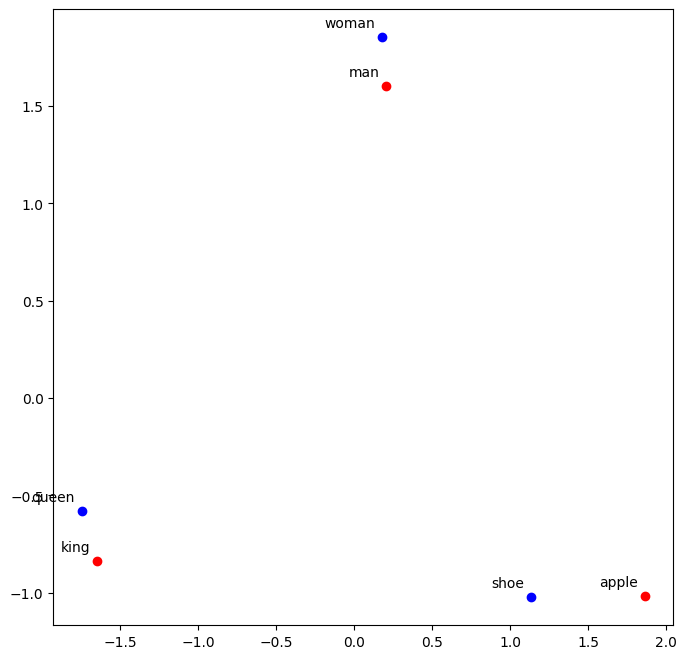

In [ ]:
#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of words to visualize
words = ['king', 'queen', 'man', 'woman', 'apple', 'shoe']

# Generate embeddings
vectors = [model.get_vector(word) for word in words]

# Perform dimensionality reduction
#vectors_2d = TSNE(n_components=2, random_state=0).fit_transform(vectors)
vectors_2d = PCA(n_components = 2).fit_transform(vectors)

# Plot results
plt.figure(figsize=(8,8))
for i, word in enumerate(words):
    if i%2 == 0:
        plt.scatter(*vectors_2d[i,:], color='red')
    else:
        plt.scatter(*vectors_2d[i,:], color='blue')
    plt.annotate(word, xy=vectors_2d[i,:], xytext=(-5,5), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
# print the word(s) closest to the new vector in the model's vocabulary
# "vector_king - vector_man + vector_woman = ?"
new_vector = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(new_vector[0][0])

queen


# More visualizations
### Let's pick a few more words to plot. You can see similar words end up in similar locations.

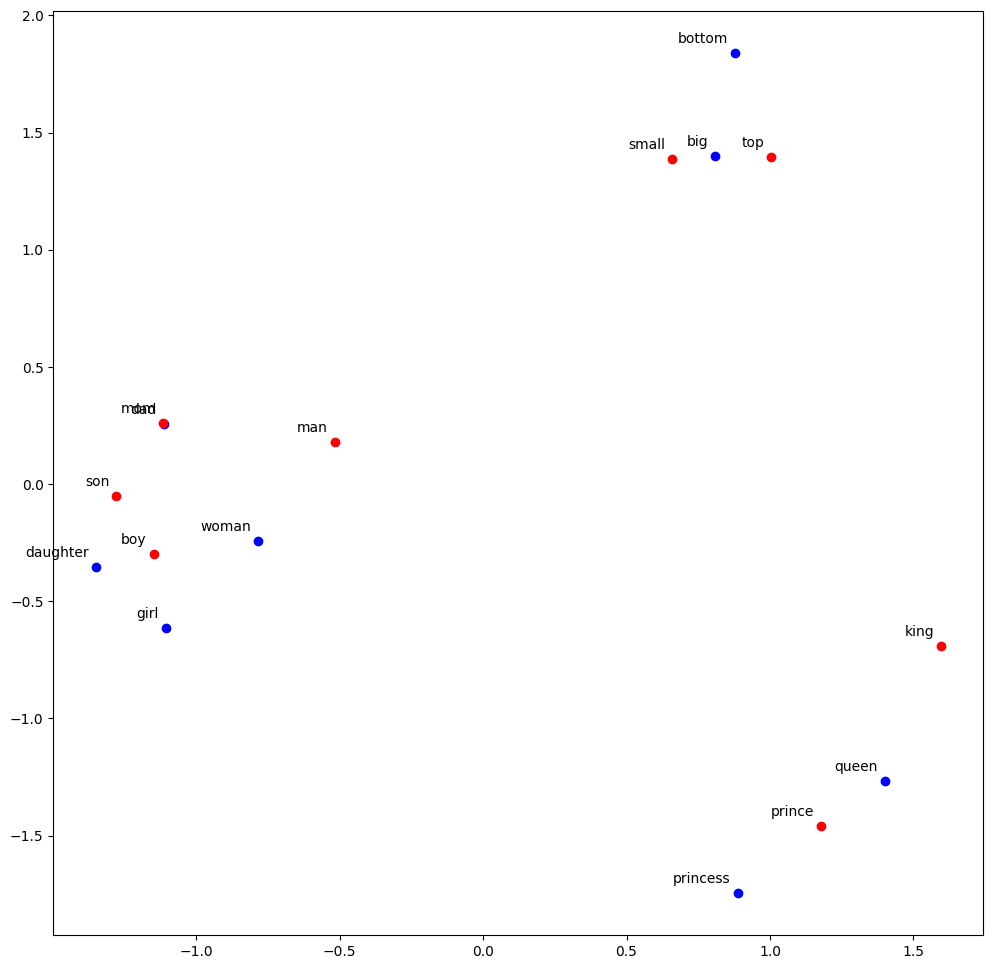

In [ ]:
# Similar words end up near each other
words = ['boy', 'girl', 'son', 'daughter','king', 'dad', 'mom','queen', 'man', 'woman', 'small', 'big', 'prince', 'princess', 'top', 'bottom']

# Generate embeddings
vectors = [model.get_vector(word) for word in words]

# Perform dimensionality reduction
#vectors_2d = TSNE(n_components=2, random_state=0).fit_transform(vectors)
vectors_2d = PCA(n_components = 2).fit_transform(vectors)

# Plot results
plt.figure(figsize=(12,12))
for i, word in enumerate(words):
    if i%2 == 0:
        plt.scatter(*vectors_2d[i,:], color='red')
    else:
        plt.scatter(*vectors_2d[i,:], color='blue')
    plt.annotate(word, xy=vectors_2d[i,:], xytext=(-5,5), textcoords='offset points', ha='right', va='bottom')
plt.show()

## Dicuss
### What do you take away from the above graph? The distance from "man" to "woman" is the roughly the same from "king" to "queen". As are "boy" and "girl" vs "daughter" and "son". Why is this? Why are the reprentations of "mom" and "dad" so much closer than say "king" and "queen"?

In [ ]:
# print the word(s) closest to the new vector in the model's vocabulary
# "vector_king - vector_man + vector_woman = ?"
new_vector = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(new_vector[0][0])

queen


## Word Embeddings are non-interpretable
### This means that the numbers in each vector don't mean anything, they are created by the relative word proximities in the text.

In [ ]:
# Train a Word2Vec model on nonsense text and plot the resultant vectors
nonsense_corpus = [
    ['king', 'boy', 'a', 'son', 'horse'],
    ['queen', 'is', 'daughter', 'woman', 'man'],
    ['man', 'is', 'bigger', 'than', 'a', 'horse'],
    ['woman', 'is', 'big', 'prince', 'queen'],
    ['boy', 'are', 'known', 'for', 'their', 'love', 'of', 'swimming'],
    ['girl', 'can', 'fly', 'high', 'in', 'the', 'sky'],
    ['birds', 'live', 'top', 'and', 'swim', 'very', 'small'],
    ['children', 'teach', 'at', 'bottom', 'and', 'big', 'learn'],
    ['cars', 'are', 'dad', 'type', 'of', 'fruit', 'that', 'is', 'very', 'juicy'],
    ['books', 'princess', 'used', 'for', 'cooking', 'delicious', 'meals'],
    ['computers', 'are', 'grown', 'mom', 'farms', 'and', 'picked', 'during', 'the', 'harvest', 'season'],
]
our_model = Word2Vec(nonsense_corpus, vector_size=300, min_count=1, workers=-1)

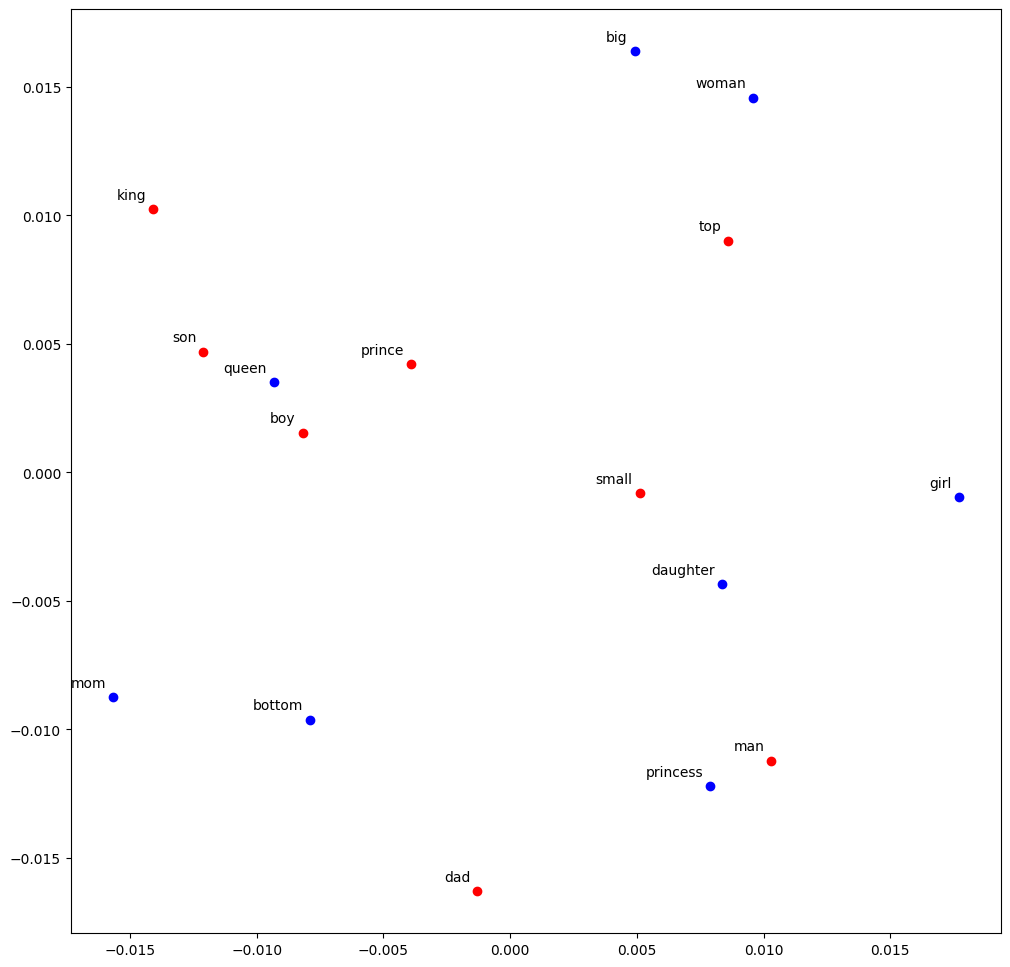

In [ ]:
# List of words to visualize
words = ['boy', 'girl', 'dad', 'mom', 'son', 'daughter','king', 'queen', 'man', 'woman', 'small', 'big', 'prince', 'princess', 'top', 'bottom']

# Generate embeddings
vectors = [our_model.wv[word] for word in words]

# Perform dimensionality reduction
#vectors_2d = TSNE(n_components=2, random_state=0).fit_transform(vectors)
vectors_2d = PCA(n_components = 2).fit_transform(vectors)

# Plot results

plt.figure(figsize=(12,12))
for i, word in enumerate(words):
    if i%2 == 0:
        plt.scatter(*vectors_2d[i,:], color='red')
    else:
        plt.scatter(*vectors_2d[i,:], color='blue')
    plt.annotate(word, xy=vectors_2d[i,:], xytext=(-5,5), textcoords='offset points', ha='right', va='bottom')
plt.show()

## More to Explore!
### Try different word embeddings and visualization methods
### **Warning: Visualizing Word2Vec all with T-SNE is computationally expensive, use PCA**
[Exploring Word Embeddings](https://projector.tensorflow.org/)